# CMSC 197 (Machine Learning) - Assignment 3

### Earl James Q. Rentillo

In [32]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Loading the Advertising.csv dataset

In [33]:
df = pd.read_csv("data/Advertising.csv")

In [34]:
df_mean = df.mean()
df_std = df.std()
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Standardizing each column of the dataset

In [35]:
df = (df - df_mean)/df_std
df

,TV,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
195,-1.267759,-1.317724,-0.769287,-1.230964
196,-0.615491,-1.236899,-1.031011,-0.828469
197,0.348934,-0.940539,-1.109069,-0.234310
198,1.590574,1.261955,1.636743,2.199827


## Adding an extra column composing of all 1s to X

In [36]:
x = df.drop("sales", axis = 1)
x.insert(0, "bias", 1)
y = df["sales"]
x

,bias,TV,radio,newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593
...,...,...,...,...
195,1,-1.267759,-1.317724,-0.769287
196,1,-0.615491,-1.236899,-1.031011
197,1,0.348934,-0.940539,-1.109069
198,1,1.590574,1.261955,1.636743


## Dividing the dataset into training set (0.85) and testing set (0.15)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)


## Fitting the model on the training set

In [38]:
# initializing weights

def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w


In [39]:
# predicting y 

def predict(x, weights): 
    return np.dot(x, weights)


In [40]:
# computing the cost

def compute_cost(y, y_hat):
    y_shape = y.shape[0]
    square = (y_hat - y)**2
    cost = np.sum(square)/(y_shape*2)
    return cost

# where y is the actual value and y_hat is the predicted value

In [41]:
# computing the gradient 

def compute_gradient(x, y, y_hat, a):
    y_shape = y.shape[0]
    dot_product = np.dot(x.T, y_hat - y) 
    w = (a*dot_product)/y_shape
    return w

In [42]:
# updating the weights 

def update_weights(weights, gradient):
    w = weights - gradient
    return w

In [43]:
# gradient descent function, with learning rate a = 0.01 

def grad_descent(x, y, iteration, weights, a = 0.01):
    i = 0
    list_of_costs = []
    list_of_weights = []
    while i < iteration:
        y_hat = predict(x, weights)
        costs = compute_cost(y, y_hat)
        list_of_costs.append(costs)
        gradient = compute_gradient(x, y, y_hat, a)
        weights = update_weights(weights, gradient)
        list_of_weights.append(weights)
        i += 1
    return list_of_costs, list_of_weights

# where a = learning rate

In [44]:
#plot cost function

def plot_cost(cost):
    plt.title("Plot for Cost")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.plot(cost)
    plt.show()

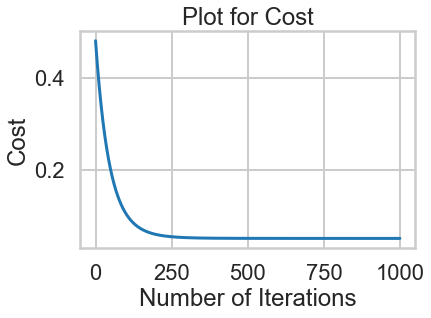

In [45]:
train_weights = initialize_weights()
training_costs, actual_weights = grad_descent(x_train, y_train, 1000, train_weights)
plot_cost(training_costs)

In [46]:
# predicting y for train set

yhat_train = predict(x_train, actual_weights[-1])
y_train_cost = compute_cost(y_train, yhat_train)
print(y_train_cost)

0.051079827865479224


In [47]:
# predicting y for test set

yhat_test = predict(x_test, actual_weights[-1])
y_test_cost = compute_cost(y_test, yhat_test)
print(y_test_cost)

0.052448649265712334


## Reverting the standardized data into the original form

In [48]:
df_scaled = x.drop("bias", axis = 1)
df_scaled["sales"] = y

df_original = (df_scaled*df_std) + df_mean
df_original

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Observing the cost results

In [49]:
x = df_original.drop("sales", axis = 1)
x.insert(0, "bias", 1)
y = df_original["sales"]

y_hat = predict(x, actual_weights[-1])
original_cost = compute_cost(y, y_hat)
print("Cost using the original data set: " + str(original_cost))



Cost using the original data set: 7508.733060086956


The cost obtained from using the original data set yields a significantly greater value compared to that of the standardized data set. This implies that the calculated weights used in the model is not fit for predicting sales of a data set that is not standardized first.

# Answers to questions

## 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model: ℎ𝜃(𝑥) = 𝜃0 + 𝜃1 𝑇𝑉 + 𝜃2𝑅𝑎𝑑𝑖𝑜 + 𝜃3𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟. 
## What are your interpretations regarding the formed linear model?

In [50]:
# As 50000 iterations take too long to process, 5000 iterations are used instead

weights = initialize_weights()
training_costs, actual_weights = grad_descent(x_train, y_train, 5000, weights)
actual_weights[-1]

array([4.35589486e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03])

Looking at the output array, the linear model can be written as: 

ℎ𝜃(𝑥) = 4.35589486e-04 + 7.37383146e-01 * 𝑇𝑉 + 5.36307180e-01 * 𝑅𝑎𝑑𝑖𝑜 + 3.14254020e-03 * 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

In this linear model, we can say that TV has the highest influence on sales as it bears the highest weight among the three predictors. This is then followed by radio and lastly, newspaper.

## 2. Provide a scatter plot of the y_hat(i) and y(i) for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn)

R2 score using train set:  0.8936793584593189


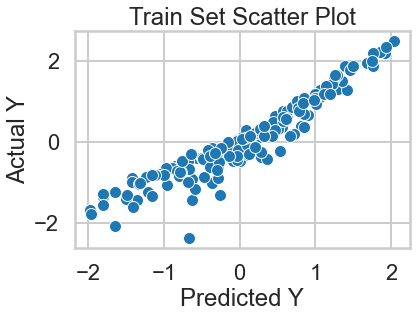

In [51]:
# scatter plot for train set

y_hat = predict(x_train, actual_weights[-1])
plt.title("Train Set Scatter Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")

sns.scatterplot(x = y_hat, y = y_train)
r2_train = r2_score(y_train, y_hat)
print("R2 score using train set: ", r2_train)

R2 score using test set:  0.911027570209169


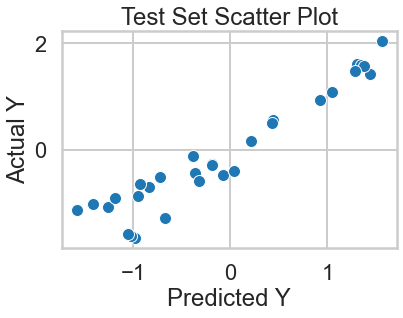

In [52]:
# scatter plot for test set

y_hat = predict(x_test, actual_weights[-1])
plt.title("Test Set Scatter Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")

sns.scatterplot(x = y_hat, y = y_test)
r2_train = r2_score(y_test, y_hat)
print("R2 score using test set: ", r2_train)

Both the train and test sets follow a linearly increasing trend between their respective y_hat (predicted) and y (actual) values. Backed by high R2 scores, these imply that the model shows good fit for the data set.

## 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

### Calculating the error, r2, and cost for 1000, 10000, and 50000 iterations

In [53]:
# setting 0 as initial weights and using the test set for each iteration and 
# pre-calculating results up to the 50000th iteration

weights = initialize_weights()
training_costs, actual_weights = grad_descent(x_train, y_train, 50000, weights)

In [54]:
# error, r2, and cost for 1000 iterations

y_hat1 = predict(x_train, actual_weights[999])
r2_score1 = r2_score(y_train, y_hat1)
MAE1 = mean_absolute_error(y_train, y_hat1)
print("cost for 1000 iterations: ", training_costs[999])
print("r2 score for 1000 iterations: ", r2_score1)
print("MAE for 1000 iterations: ", MAE1)

cost for 1000 iterations:  0.051079831065374885
r2 score for 1000 iterations:  0.8936787899351376
MAE for 1000 iterations:  0.23638702622051314


In [55]:
# error, r2, and cost for 10000 iterations

y_hat2 = predict(x_train, actual_weights[9999])
r2_score2 = r2_score(y_train, y_hat2)
MAE2 = mean_absolute_error(y_train, y_hat2)
print("cost for 10000 iterations: ", training_costs[9999])
print("r2 score for 10000 iterations: ", r2_score2)
print("MAE for 10000 iterations: ", MAE2)

cost for 10000 iterations:  0.05107955472978693
r2 score for 10000 iterations:  0.8936793584593188
MAE for 10000 iterations:  0.2363335722057068


In [56]:
# error, r2, and cost for 50000 iterations

y_hat3 = predict(x_train, actual_weights[49999])
r2_score3 = r2_score(y_train, y_hat3)
MAE3 = mean_absolute_error(y_train, y_hat3)
print("cost for 50000 iterations: ", training_costs[49999])
print("r2 score for 50000 iterations: ", r2_score3)
print("MAE for 50000 iterations: ", MAE3)

cost for 50000 iterations:  0.05107955472978693
r2 score for 50000 iterations:  0.8936793584593188
MAE for 50000 iterations:  0.2363335722057068


As the number of iterations increases, so do the r2 scores. The mean absolute error and cost, however, decrease as the number of iterations increases, indicating an inverse relationship among these values. Additionally, the changes also become more minute as iterations are increased. In fact, between the 10000th and 50000th iterations, no changes among the r2 score, cost, and MAE can be seen.


## 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

In [57]:
# based on the results, around 0.051 is the optimal cost as it no longer lowers beyond that number in later iterations
# round off the training costs to three decimal places
round_cost = np.round(training_costs, 3)

# finding the iteration where the cost is equal to 0.051
optimal_iteration = np.where(round_cost == 0.051)

# using optimal_iteration[0][0] to get the first iteration where the cost is equal to 0.51
print("Optimal iteration: ", optimal_iteration[0][0])

Optimal iteration:  395


In [58]:
list_of_alpha = [0.0001, 0.001, 0.01, 0.1, 0.2]
list_of_costs = []
optimal_i = optimal_iteration[0][0]

for alpha in list_of_alpha:
    print("For alpha rate, a = " + str(alpha) + ": ")
    
    weights = initialize_weights()
    training_costs4, actual_weights4 = grad_descent(x_train, y_train, optimal_i, weights, alpha)
    list_of_costs.append(training_costs4)
    
    y_hat4 = predict(x_train, actual_weights4[-1])
    r2_score4 = r2_score(y_train, y_hat4)
    MAE4 = mean_absolute_error(y_train, y_hat4)
    print("Cost: ", training_costs4[-1])
    print("R2 score:", r2_score4)
    print("MAE:", MAE4)
    print("\n")
    


For alpha rate, a = 0.0001: 
Cost:  0.44536428998765176
R2 score: 0.07316466002826261
MAE: 0.7659393426083329


For alpha rate, a = 0.001: 
Cost:  0.23622673852442644
R2 score: 0.5091073142387439
MAE: 0.5448373669343117


For alpha rate, a = 0.01: 
Cost:  0.051500250039664096
R2 score: 0.8928156299702762
MAE: 0.23829966701270577


For alpha rate, a = 0.1: 
Cost:  0.051079554729786925
R2 score: 0.8936793584593189
MAE: 0.2363335722067986


For alpha rate, a = 0.2: 
Cost:  0.051079554729786925
R2 score: 0.8936793584593189
MAE: 0.23633357220570614




<AxesSubplot:title={'center':'Cost of different learning rates'}, xlabel='Number of Iterations', ylabel='Cost'>

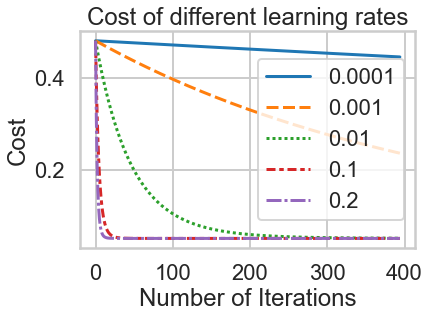

In [59]:
# plotting the costs of different learning rates

data_cost = pd.DataFrame(list_of_costs).T
data_cost.columns = list_of_alpha
plt.title("Cost of different learning rates")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
sns.lineplot(data = data_cost)

From the plot, we can see that among the different learning rates, a = 0.0001 is the least steep which means that it would take the longest time for it to reach the optimal iteration, as 0.0001 is just too little of a step in obtaining the optimum value. This is followed by a = 0.001 which can still be improved. The rate starts to get better at a = 0.01 as the rate is not too high or low with the MAE decreasing as well. Increasing it to a = 0.1 however furthers the improvement. Lastly, the best learning rate can be seen at a = 0.2, showing the most drastic decrease in cost in the least possible iterations.

## 5. Is there a relationship on the learning rate and the number of iterations?

As previously observed in (4), as the learning rate is gradually increased, the number of iterations to get to the optimal number also decreases, which shows an inversely proportional relationship. Higher learning rates in the plot also show that  costs lessen more drastically in lesser number of iterations, while lower learning rates would take more iterations.

## 6. Compare the results with the results of ordinary least squares function.

In [61]:
lr = LinearRegression().fit(x_train, y_train)
lr_yhat = lr.predict(x_test)
lr_yhat

array([ 0.44441111,  1.30168679,  1.43691235, -0.66730857,  1.55533551,
       -0.19033088,  1.34451196, -1.25613029, -0.07239572,  0.21395403,
       -0.9477649 , -1.4143734 ,  0.04187445, -0.9794427 , -0.82941714,
       -0.35860114, -1.02352749,  0.43360346, -0.72253191,  0.92669059,
        1.04134773, -0.18638735, -0.32341141,  1.3765889 , -1.1785509 ,
       -1.57241482,  1.28461088, -0.38557956, -0.92832092, -1.05226106])

In [63]:
# calculating the r2 score of the linear regression

r2_score_lr = lr.score(x_test, y_test)
print("R2 score: ", r2_score_lr)

R2 score:  0.9110275702091714


In [64]:
# using the weight of the optimal iteration of the gradient descent

optimal_yhat = predict(x_test, actual_weights[394])
optimal_yhat

array([ 0.45632242,  1.28440583,  1.42255522, -0.6482762 ,  1.47624351,
       -0.16993274,  1.30064552, -1.2352999 , -0.07222912,  0.21357984,
       -0.96178875, -1.37293563,  0.1208764 , -0.98922631, -0.79911416,
       -0.33197871, -0.9948767 ,  0.40902538, -0.70284619,  0.88597173,
        1.06582203, -0.09822649, -0.35109566,  1.3892682 , -1.1769486 ,
       -1.53434624,  1.2500434 , -0.39232188, -0.90517284, -1.0666816 ])

In [65]:
# calculating the r2 score

optimal_r2_score = r2_score(y_test, optimal_yhat)
print("R2 score: ", optimal_r2_score)

R2 score:  0.906288920753653


Gathering the results of the gradient descent (r2 = 0.894, at a = 0.2) and linear regression (r2 = 0.906), the difference between the r2 scores is seen to be minimal, with OLS scoring slightly higher. Despite both being good fit to the data, the results also imply that OLS provides a slightly better fit since it has a higher r2 score than a gradient descent with a learning rate of 0.2.